# 機械学習

# 線形回帰モデル

### 回帰問題
* ある入力(離散あるいは連続値)から出力(連続値)を予測する問題
* 直線で予測…線形回帰
* 曲線で予測…非線形回帰
___ 
### 回帰で扱うデータ
* 入力…元のベクトル(m=1の場合はスカラ)(説明変数)
* 出力…値(目的変数)
___

### 線形回帰モデル
$$\hat{y}=w^\intercal x+w_0=\sum_{j=1}^mw_jx_j+w_0$$
* 回帰問題を解くための機械学習モデルの1つ
* 教師あり学習
* **入力とm次元パラメータの線形結合を出力する**モデル
___
### 線形結合
* 入力とパラメータの内積
* 入力ベクトルとの線形結合に加え、切片$w_0$も足し加える
___

### モデルのパラメータ
* 推定すべきパラメータ
* 特徴量が予測値に対してどのように影響を与えるかを決定する重みの集合
* **最小二乗法により推定**
___

### 単回帰モデル
$$
y=w_0+w_1x_1+\epsilon
$$
* 入力(説明変数)が1次元の場合、単回帰モデルという
* 推定すべきパラメータである$w_1$を回帰係数という
* ここでの$\epsilon$は誤差をあらわす
___

### 単回帰モデルの行列表現
$$y=Xw+\epsilon$$


$$
\left\{
\begin{array}{ll}
y=(y_1,y_2,...,y_n)^\intercal\\
X=(x_1,x_2,...,x_n)^\intercal\\
x_i=(1,x_1)^\intercal\\
w=(w_0,w_1)^\intercal\\
\epsilon=(\epsilon_1,\epsilon_2,...,\epsilon_n)^\intercal
\end{array}
\right.
$$
* 単回帰は説明変数が1次元なので、パラメータ$w$も1次元
___

### 重回帰モデル
$$
y=w_0+w_1x_1+w_2x_2+\epsilon
$$
* 入力(説明変数)が2次元以上の場合、重回帰モデルという
* 重回帰モデルではデータを曲面で観測する
___

### 重回帰モデルの行列表現
$$y=Xw+\epsilon$$


$$
\left\{
\begin{array}{ll}
y=(y_1,y_2,...,y_n)^\intercal\\
X=(x_1,x_2,...,x_n)^\intercal\\
x_i=(1,x_{i1},...,x_{im})^\intercal\\
w=(w_0,w_1,...,w_m)^\intercal\\
\epsilon=(\epsilon_1,\epsilon_2,...,\epsilon_n)^\intercal
\end{array}
\right.
$$
* 重回帰では説明変数が増え、それに伴い、パラメータ$w$が増える(次元数が増える)
___

### データの分割とモデルの汎化性能測定
* 学習用データ...機械学習のモデルの学習に使用するデータ
* 検証用データ...学習済みモデルの精度の検証に使用するデータ
* シンプルに比率でに分割する分割手法をホールドアウト法という
___

### 平均二乗誤差(残差平方和)
$$MSE=\frac1{n}\sum_{i=1}^n(\hat{y_i}-y_i)^2$$
* データとモデル出力の二乗誤差の和
* 小さいほど直線とデータの距離が近い(誤差が小さい)
___

### 最小二乗法
学習データの平均二乗誤差を最小とするパラメータを探索
$$\hat{w}=argmin MSE$$
学習データの平均二乗誤差の最小化は、その勾配が0になる点を求めれば良い
$$\frac{\partial}{\partial w}MSE=0$$
___

### 最小二乗法(2)
回帰係数
$$\hat{w}=(X^\intercal X)^{-1}X^\intercal y$$
予測値
$$\hat{y}=X(X^\intercal X)^{-1}X^\intercal y$$
* 線形回帰の場合には、最尤法による解は最小二乗法の解と一致する
___

### ハンズオン

In [21]:
import warnings
warnings.filterwarnings('ignore')

* 「倫理的観点より、ボストンの住宅データセットは非推奨である」という警告が出るため警告を無視するようにする

In [34]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

* 必要なライブラリインポート

In [35]:
boston = load_boston()  
df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
df['PRICE'] = np.array(boston.target)

data = df.loc[:, ['CRIM', 'RM']].values
target = df.loc[:, 'PRICE'].values

model = LinearRegression()
model.fit(data, target)

model.predict([[0.3, 4]])

array([4.24007956])

* ボストンの住宅データセットを線形回帰モデルで分析
* 課題...部屋数が4で犯罪率が0.3の物件はいくらになるか？
* 結果...4,240$　
___

# 非線形回帰モデル

### 非線形回帰
* 非線形とは、おおよそ「比例関係にない」こと
* データの構造を線形で捉えるのは限界がる
* 非線形な構造をとらえられる仕組みが必要
___

### 基底展開法
$$
y_i=w_0+\sum_{j=1}^mw_j\phi_j(x_i)+\epsilon
$$
* 回帰関数として、基底関数と呼ばれる既知の非線形関数とパラメータベクトルの線型結合を使用
* 要は、$x_i$を一度非線形写像する
___

### よく使われる基底関数
多項式関数
$$\phi_j=x^j$$
ガウス型基底関数
$$\phi_j(x)=exp{\left\{\frac{(x-\mu_j)^2}{2h_j}\right\}}$$
2次元ガウス型基底関数
$$\phi_j(x)=exp{\left\{\frac{(x-\mu_j)^\intercal(x-\mu_j)}{2h_j}\right\}}$$
___

### 最尤法による予測値
$$\hat{y}=\Phi(\Phi^\intercal \Phi)^{-1}\Phi^\intercal y$$
* 基底展開法も線形回帰と同じ枠組みで推定可能
* 線形回帰の予測値の式と一致する
___

### 未学習(underfittingu)と過学習(overfitting)
* 未学習...学習データに対して、十分小さな誤差が得られないモデル
* 過学習...小さな誤差は得られたけど、テスト集合誤差との差が大きいモデル
___

### 過学習対策
* 不要な基底関数を削除する
* 正則化(罰則化)を用いる
___

### 正則化項の役割
L2ノルムをを利用...Ridge推定量
* 縮小推定
* 制約を円で取る
* パラメータを0に近づけるように推定

L1ノルムをを利用...Lasso推定量
* スパース推定
* 制約をダイヤ形で取る
* いくつかのパラメータを0に推定
* 0にすることで、不要な基底矢変数を排除することができる
___

### 汎化性能
* 学習に使用した入力だけでなく、これまで見たことのない新たな入力に対する予測性能
* 学習誤差(訓練誤差)ではなく、汎化誤差(検証誤差、テスト誤差)が小さいものが良いモデルとされる
* 汎化誤差は通常、学習データとは別に収集された検証データでの性能を測ることで推定
___

### クロスバリデーション(交差検証)
* ホールドアウト法には、手元にデータが大量にある場合を除いて、良い性能評価を与えないという欠点がある
* 分割する方法パターンをイテレータごとに変える(5分割交差検証の場合、イテレータは5)
* イテレータ毎に検証データが重複しないようにする
* イテレータ毎の検証結果に対し、平均値(CV値)を算出し、評価する
___

### グリッドサーチ
* 全てのチューニングパラメータの組み合わせで評価値を算出
* ハイパーパラメータチューニング手法のひとつであり、現在は、ベイズ最適化がよく利用される
___

### ハンズオン

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

%matplotlib inline

* 必要なライブラリのインポート

In [2]:
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 
def linear_func(x):
    z = x
    return z 

data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)
noise = 0.5 * np.random.randn(n) 
target = target + noise

* データの準備

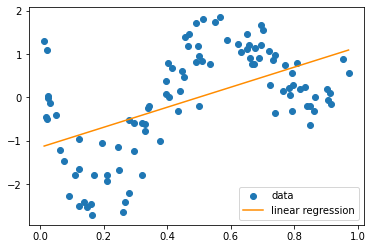

In [14]:
clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', label='linear regression')
plt.legend()
plt.show()

* シンプルな線形回帰
* 表現力に欠け、未学習気味なのがわかる

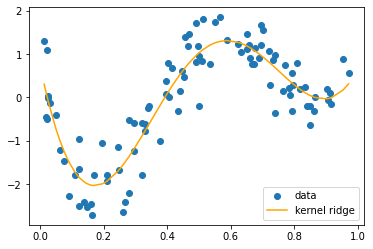

In [4]:
clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_kridge, color='orange', label='kernel ridge')
plt.legend()
plt.show()

* RBFカーネルによる非線型回帰
* 線形回帰と比べ、表現力が増している

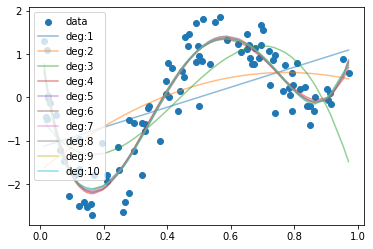

In [20]:
deg = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(data, target, label='data')
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    p_poly = regr.predict(data)
    plt.plot(data, p_poly, label='deg:%d' % (d), alpha=0.5)
plt.legend()
plt.show()

* 多項式回帰(重回帰分析の一種)
* 1~10次元までの結果を示す
___

# ロジスティック回帰モデル

### 分類問題
* ある入力(数値)からクラスに分類する問題
* ロジスティック**回帰**とあるが、分類モデルであることに注意
___

### 分類で扱うデータ
* 入力...m次元のベクトル(m=1の場合はスカラ)
* 出力...0 or 1の値
___

### ロジスティック線形回帰モデル
$$P(Y=1|x)=\sigma(w_0+w_1x_1)$$
* 分類問題を解くための教師あり機械学習モデル
* 入力とm次元パラメータの線形結合をシグモイド関数に入力(線形回帰との違いはここだけ)
* 出力はy=1になる確率の値になる
* 確率が0.5以上なら「1」，0.5未満なら「0」と予測
___

### シグモイド関数
$$\sigma(x)=\frac{1}{1+exp(-ax)}$$
* 入力は実数・出力は必ず0~1の値
* (クラス1に分類される)確率を表現
* 単調増加関数
___

### シグモイド関数の性質
$$\frac{\partial \sigma(x)}{\partial x}=a\sigma(x)(1-\sigma(x))$$
* シグモイド関数の微分は、シグモイド関数自身で表現することが可能
* 度関数の微分を行う際にこの事実を利用すると計算が容易
___

### 最尤推定
* 最尤推定量(最も尤もらしい推定量のこと)を求める
* 尤度関数を最大化するようなパラメータを選ぶ推定方法を最尤推定という
___

### ロジスティック回帰モデルの最尤推定
尤度関数
$$L(w)=P(y_1,y_2,...,y_n;p)=\prod_{i=1}^np^{y_i}(1-p)^{1-y_i}$$
負の対数尤度関数
$$E(w)=-logL(w)=-\sum_{i=1}^n\left\{y_ilogp_i+(1-y_i)log(1-p_k)\right\}$$
* 確率変数は独立であることを仮定すると、それぞれの確率の掛け算となる
* 確率pはシグモイド関数となるため、推定するパラメータは重みパラメータとなる(パラメータのみに依存する)
* 「同時確率の積が和に変換可能」、「指数が積の演算に変換可能」という理由のもと、対数をとる
* 対数尤度関数が最大になる点と尤度関数が最大になる点は同じ
* 「尤度関数にマイナスをかけたものを最小化」し、「最小2乗法の最小化」と合わせる
___

### 勾配降下法
$$w^{k+1}=w^k-\eta\frac{\partial E(w)}{\partial w}$$
* 反復学習によりパラメータを逐次的に更新するアプローチの一つ
* パラメータの更新がなくなるくらいまで繰り返す
* $\eta$...学習率
___

### 勾配降下法(2)
ロジスティック回帰における勾配の計算
$$
\begin{align}
\frac{\partial E(w)}{\partial w}
&=\sum_{i=1}^n\frac{\partial E(w)}{\partial p_i}\frac{\partial p_i}{\partial w}\\
&=-\sum_{i=1}^n(y_i-p_i)x_i
\end{align}
$$
* 途中式は省略するが、連鎖率、対数の微分、シグモイド関数の微分の知識が必要
___

### 勾配降下法(3)
ロジスティック回帰における更新式
$$w^{k+1}=w^k+\eta\sum_{i=1}^n(y_i-p_i)x_i$$
* パラメータが更新されなくなった場合、それは勾配が0になったということ
* 勾配降下法では、パラメータを更新するのにN個全てのデータに対する和を求める必要がある
___

### 確率的勾配降下法(SGD)
* データを一つずつランダムに(確率的に)選んでパラメータを更新
* 勾配降下法でパラメータを1回更新するのと同じ計算量でパラメータをn回更新できるので効率よく最適な解を探索可能
___

### ロジスティック回帰モデルの性能評価
* 混同行列...TP、FP、FN、TNの4つの予測結果の個数をまとめた表
* 正解率は、クラス数に偏りがある時、意味をなさない

再現率(Recall)
$$\frac{TP}{TP+FN}$$
* 本当にPositiveなものの中からPositiveと予測できる割合
* 「誤り(False Positive)が多少多くても抜け漏れは少ない」予測をしたい際に利用

適合率(Precision)
$$\frac{TP}{TP+FP}$$
* 「Positiveと予測」したものの中で本当にPositiveである割合
* 見逃し(False Negative)が多くてもより正確な」予測をしたい際に利用

F値
$$\frac{2\times Precison\times Recall}{Precision+Recall }$$
* 再現率と適合率はトレードオフの関係にある
* 調和平均であり、両者のバランスを示している。高ければ高いほどともに高くなる。
___

### ハンズオン

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

* 必要なライブラリのインポート

In [36]:
titanic_df = pd.read_csv('study_ai_ml_google/data/titanic_train.csv')

titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)

* データの読み込み
* nullを含むAgeの行に対し、中央値での補完を行い、新たな列を作成
* 文字列のデータであるSexの行をカテゴリカル変数へと変換し、新たな列を作成

In [38]:
data = titanic_df.loc[:, ['AgeFill', 'Gender']].values
label = titanic_df.loc[:,['Survived']].values

model=LogisticRegression()
model.fit(data, label)

print(model.predict([[30, 1]]))
print(model.predict_proba([[30, 1]]))

[0]
[[0.80668102 0.19331898]]


* タイタニックの乗客データを利用しロジスティック回帰モデルを作成
* 課題...年齢が30歳で男の乗客は生き残れるか？
* 結果...生き残れない、約80％の確率で死亡
___

# 主成分分析

### 主成分分析
* 多変量データの持つ構造をより少数個の指標に圧縮(情報の損失はなるべく小さくしたい)
* 2、3次元に圧縮することで、可視化が実現可能
___

### 主成分分析(2)
学習データ
$$x_i=(x_{i1}, x_{i2}, ..., x_{im})∈R^m$$
平均(**ベクトル**)
$$\bar x=\frac{1}{n}\sum_{i=1}^nx_i$$
データ行列
$$\bar X=(x_1-\bar x, ...x_n-\bar x)^T$$
分散共分散行列
$$Var(\bar X)=\frac{1}{n}\bar X^T \bar X$$
線形変換後のベクトル
$$s_j=(s_{1j}-s_{nj})^T=\bar X a_j$$
線形変換後の分散
$$
\begin{align}
Var(S_j)&=\frac{1}{n}(\bar Xa_j)^T(\bar Xa_j)\\
&=a_j^TVar(\bar X)a_j
\end{align}
$$
* 分散の大きさを情報量と捉える
* 線形変換後の変数の分散が最大となる射影軸を探索
___

### ラグランジュ関数
$$E(a_j)=a_j^TVar(\bar X)a_j-\lambda(a_j^Ta_j-1)$$
* $\lambda$...ラグランジュ乗数
* 上記のラグランジュ関数を最大にする係数ベクトル$a_j$を探索
* 制約は、「ノルムが1となる」という意味合い
___

### ラグランジュ関数(2)
$$
\frac{\partial E(a_j)}{\partial a_j}=0\Leftrightarrow \\
2Var(\bar X)a_j-2\lambda a_j=0\Leftrightarrow\\
Var(\bar X)a_f=\lambda a_j
$$
より、線形変換後の(射影先の)分散は、
$$
\begin{align}
Var(S_j)&=a_j^TVar(\bar X)a_j\\
&=\lambda_1a_1^Ta_1\\
&=\lambda_1
\end{align}
$$
* 上記より、最適化問題は、固有値問題に置き換えることが出来る
* 分散共分散行列を計算→固有値問題を解く→k番目の固有値(昇順)に対応するベクトルを第k主成分という
___

### 寄与率
$$c_k=\frac{\lambda_k}{\sum_{i=1}^m\lambda_i}$$
* 第k主成分の分散の全分散に対する割合
* 第k主成分が持つ情報量の割合を示す
___

### 累積寄与率
$$r_k=\frac{\sum_{j=1}^m\lambda_j}{\sum_{i=1}^m\lambda_i}$$
* 第1-k主成分まで圧縮した際の情報損失量の割合
___

### ハンズオン

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

* 必要なライブラリのインポート

In [2]:
cancer_df = pd.read_csv('study_ai_ml_google/data/cancer.csv')
y = cancer_df.diagnosis.apply(lambda d: 1 if d == 'M' else 0)
X = cancer_df.iloc[:, 2:-1]

* データの読み込み
* 目的変数、説明変数の指定

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
print('Train score: {:.3f}'.format(logistic.score(X_train, y_train)))
print('Test score: {:.3f}'.format(logistic.score(X_test, y_test)))

Train score: 0.991
Test score: 0.965


* 標準化、ホールドアウト法によるデータの分割
* ここでは、すべての説明変数(30件)を用いて、ロジスティック回帰を検証

Text(0, 0.5, 'PC 2')

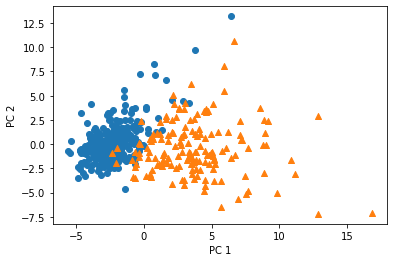

In [9]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o') 
plt.scatter(x=m[0], y=m[1], marker='^')
plt.xlabel('PC 1')
plt.ylabel('PC 2') 

* 主成分分析により、2次元にまで圧縮
* 2次元に圧縮したことにより、可視化が可能に
* 平面場で見ても、おおよそ2値の分類が可能なことがわかる

In [10]:
X_test_pca = pca.transform(X_test)
logistic = LogisticRegression()
logistic.fit(X_train_pca, y_train)
print('Train score: {:.3f}'.format(logistic.score(X_train_pca, y_train)))
print('Test score: {:.3f}'.format(logistic.score(X_test_pca, y_test)))

Train score: 0.958
Test score: 0.944


* 2つの特徴量(第1主成分と第2主成分)でロジスティック回帰
* 課題...2次元のデータを2次元上に次元圧縮した際に、うまく判別できるかを確認
* 結果...30次元の時と比較すると、若干スコアは下がったが、充分分類できている
___

# SVM(サポートベクタマシーン)

### 決定係数と分類問題
* 決定関数...2クラス分類問題において、特徴ベクトル$x$がどちらのクラスに属するかを判定するための関数
* $x$が２次元の時、決定関数は平面をあらわす
* 分類境界...2つのクラスに分ける境界線
___

### 線形サポートベクトル分類(ハードマージン)
* マージン...分類境界を挟んで2つのクラスがどのくらい離れているかの指標
* SVMでは、マージンが大きいほど良い分類境界となる
* マージン最大化...大きなマージンを持つ分類境界を探す考え方
* ハードマージン...分離可能性を仮定した場合の線形SV分類
* ここでは、分類境界の決定に関わっているのは、分類境界に最も近いデータ$x_i$のみで、他のデータは関係ない
* サポートベクトル...分類境界に最も近いデータ$xi$
___

### 線形サポートベクトル分類(ソフトマージン)
* ソフトマージン...分離可能でないデータに対応したSV分類
* 境界線が曖昧なデータにおいて、多少の分類誤りは許すようにすることで実現する
* スラック変数...マージン内に入るデータや誤分類されたデータに対する誤差を表す変数
___

### カーネルを用いた非線形分離への拡張
* カーネルトリック...特徴ベクトルを非線形変換して、その空間での線形分類を行う